In [21]:
!pip install tensorflow
!pip install tensorflow==2.4.0
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

In [2]:
import sys
print(sys.executable)

C:\Users\pahadian\Anaconda3\python.exe


In [3]:
import urllib.request

url = "https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip"
filename = "data.zip" 

urllib.request.urlretrieve(url, filename)

('data.zip', <http.client.HTTPMessage at 0x23462cbd460>)

In [4]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('dataCaption') 


In [5]:
x = []
y = []
datadir = 'data/dataset'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

8982
8982
labels : ['0', '9', 'div', 'result', '7', 'shape', '=', 'add', 'arrow', '6', '3', '4', '1', 'crossmulti', 'mul', '5', '8', '2']


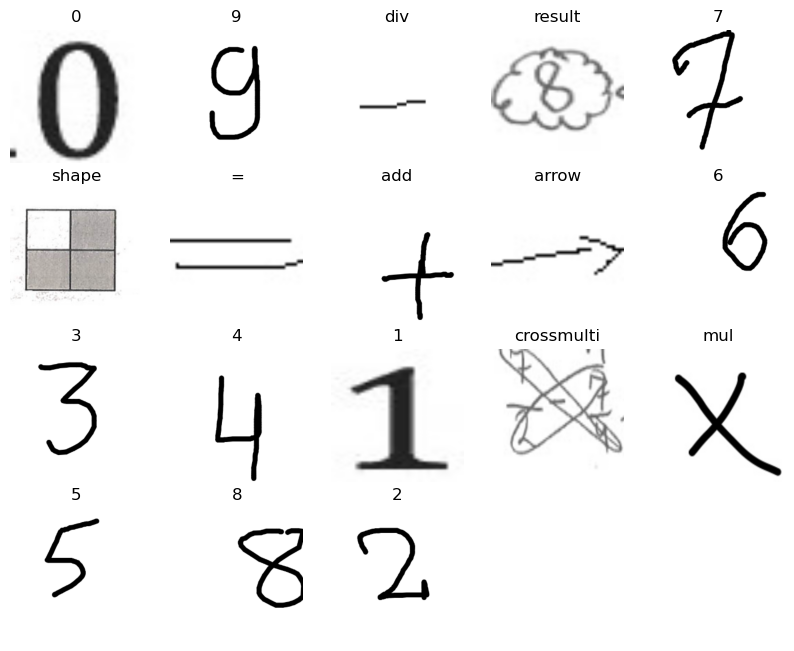

In [6]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

In [7]:
unique, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sn.barplot(unique, count).set_title('Number of Images per Category')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 2000x1000 with 0 Axes>

In [8]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (32, 32))
    X.append(threshold_image)
print(len(X))


8982


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

8982


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
unique_train, count_train = np.unique(Y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sn.barplot(unique_train, count_train).set_title('Number of Images per category in Train Set')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 2000x1000 with 0 Axes>

In [12]:
!pip install tensorflow
import tensorflow as tf

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [14]:
!pip install tensorflow
import tensorflow as tf
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7185, 32, 32, 1)
(1797, 32, 32, 1)
(7185, 18)
(1797, 18)


In [15]:
def math_symbol_and_digits_recognition(input_shape=(32, 32, 1)):
    regularizer = l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(18, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [16]:
model = math_symbol_and_digits_recognition(input_shape=(32, 32, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        320       
                                                                 
 act1 (Activation)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 32)        9248      
                                                                 
 act2 (Activation)           (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                    

In [17]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

In [18]:
aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=100, validation_data=(X_test, Y_test))
# hist2 = model2.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks)

Epoch 1/100
57/57 [==============================] - 8s 119ms/step - loss: 3.1069 - accuracy: 0.1524 - val_loss: 2.6904 - val_accuracy: 0.3139
Epoch 2/100
57/57 [==============================] - 5s 94ms/step - loss: 2.0015 - accuracy: 0.4835 - val_loss: 1.8411 - val_accuracy: 0.5804
Epoch 3/100
57/57 [==============================] - 6s 104ms/step - loss: 1.3285 - accuracy: 0.6827 - val_loss: 1.3654 - val_accuracy: 0.7412
Epoch 4/100
57/57 [==============================] - 6s 107ms/step - loss: 1.0733 - accuracy: 0.7457 - val_loss: 1.1074 - val_accuracy: 0.7941
Epoch 5/100
57/57 [==============================] - 6s 100ms/step - loss: 0.9044 - accuracy: 0.7944 - val_loss: 0.9164 - val_accuracy: 0.8358
Epoch 6/100
57/57 [==============================] - 6s 104ms/step - loss: 0.7936 - accuracy: 0.8284 - val_loss: 1.0438 - val_accuracy: 0.7691
Epoch 7/100
57/57 [==============================] - 6s 104ms/step - loss: 0.7249 - accuracy: 0.8457 - val_loss: 0.7592 - val_accuracy: 0.8731


In [20]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

In [44]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_hat, ypred))



57/57 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       113
           1       0.99      0.98      0.98       130
           2       0.97      1.00      0.98        94
           3       0.99      0.96      0.98       105
           4       0.99      0.94      0.96       131
           5       1.00      0.99      1.00       147
           6       0.99      1.00      0.99       133
           7       0.97      0.98      0.97       130
           8       0.96      0.98      0.97       108
           9       0.94      0.98      0.96       144
          10       0.98      1.00      0.99        46
          11       1.00      1.00      1.00        77
          12       1.00      1.00      1.00        72
          13       1.00      1.00      1.00        89
          14       1.00      0.94      0.97        86
          15       0.99      0.99      0.99       101
          16       1.00     

In [45]:
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'div', 'mul','=', 'arrow','crossmulti', 'result', 'shape']

    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20<=w and 30<=h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw)/2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT,
                                       value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded/255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 30ms/step


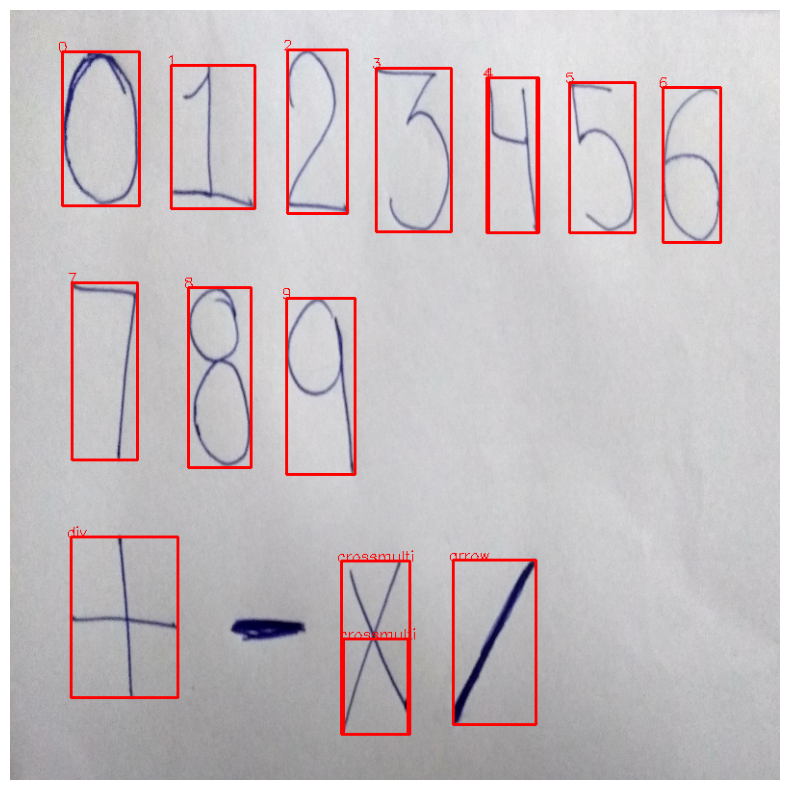

data/test.jpg


In [46]:
test_pipeline('data/test.jpg')
print('data/test.jpg')

1/1 [==============================] - 0s 32ms/step


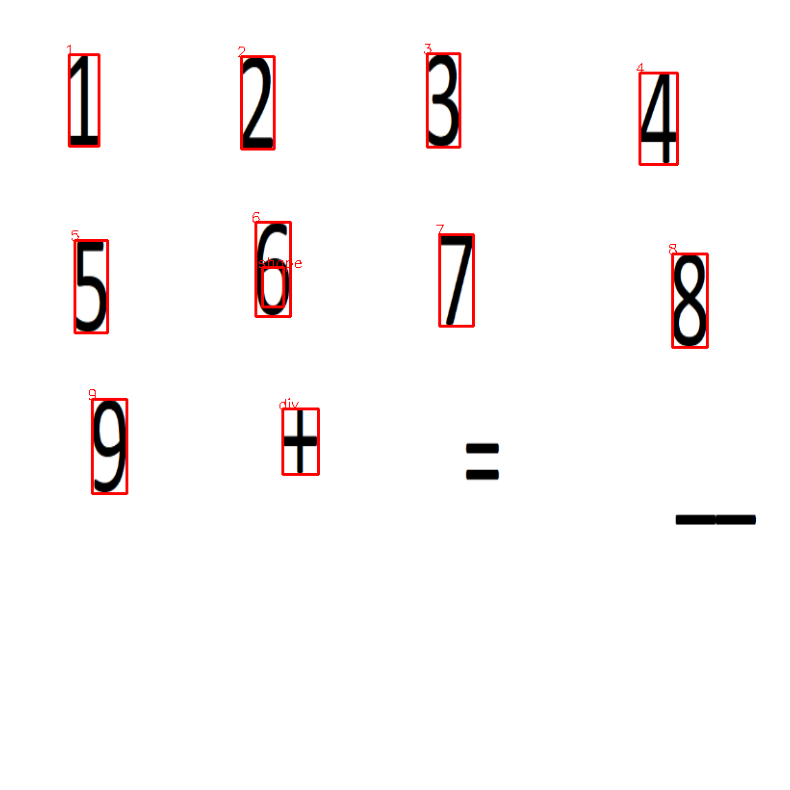

tt.png


In [47]:
test_pipeline('tt.png')
print('tt.png')

1/1 [==============================] - 0s 22ms/step


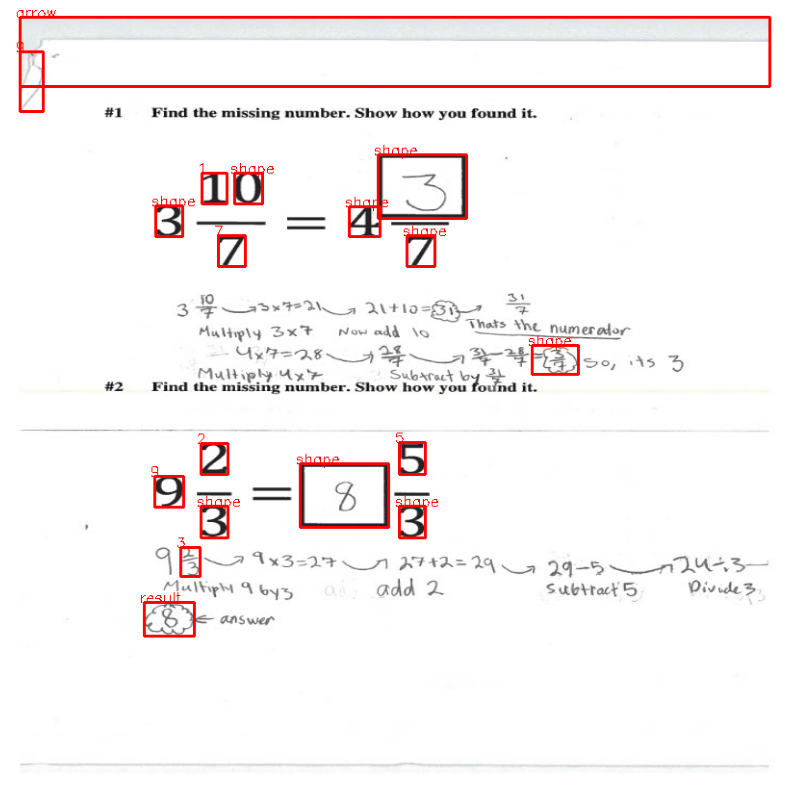

In [48]:
test_pipeline('data/5.jpg')

1/1 [==============================] - 0s 33ms/step


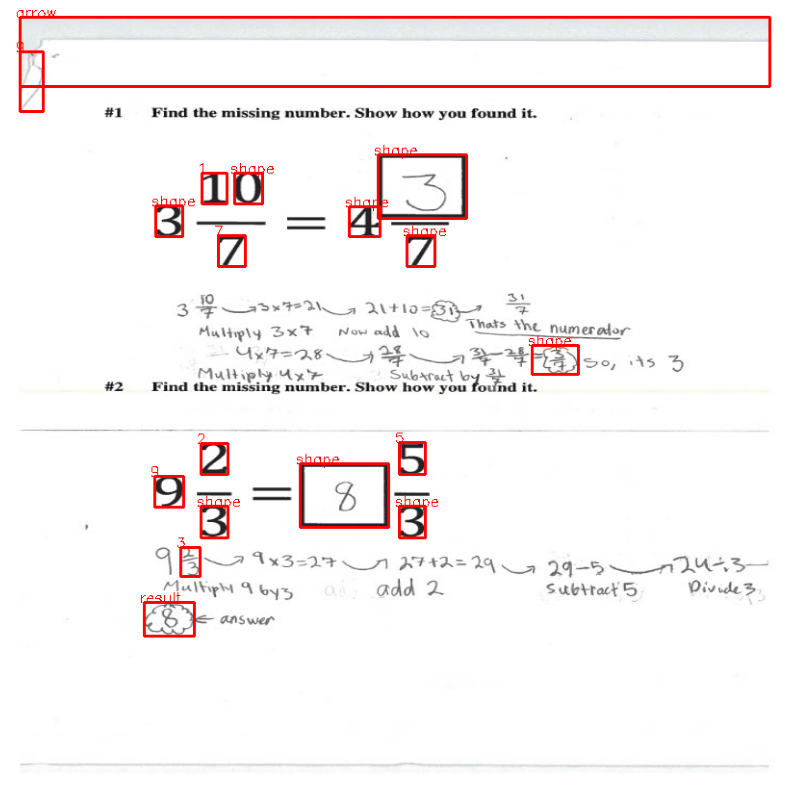

In [49]:
test_pipeline('6.jpg')

1/1 [==============================] - 0s 32ms/step


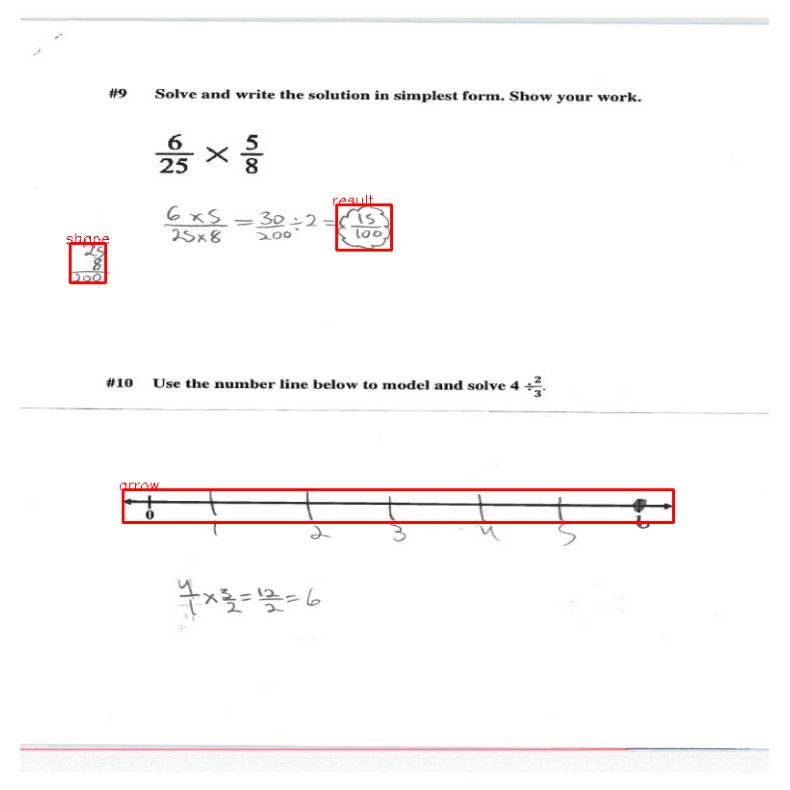

In [50]:
test_pipeline('mul.jpg')

1/1 [==============================] - 0s 20ms/step


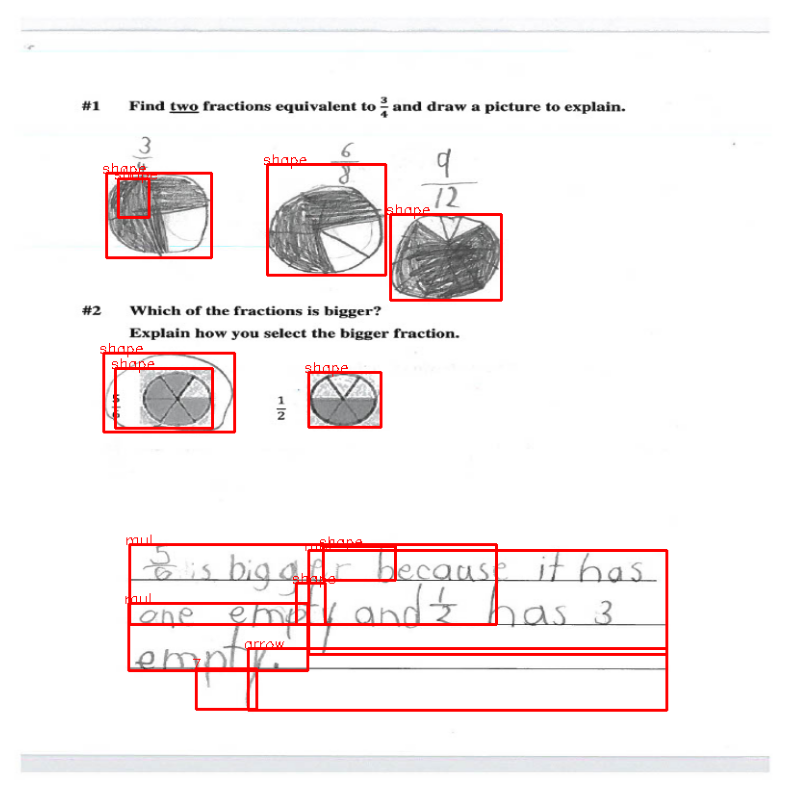

In [132]:
test_pipeline('shape.jpg')

1/1 [==============================] - 0s 25ms/step


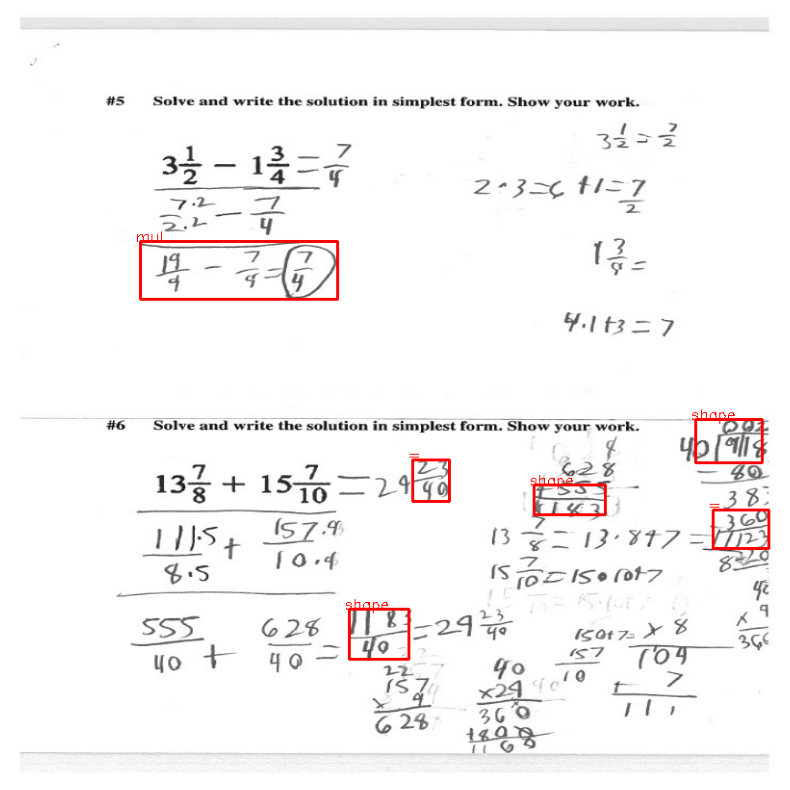

In [133]:
test_pipeline('multi.jpg')

1/1 [==============================] - 0s 16ms/step


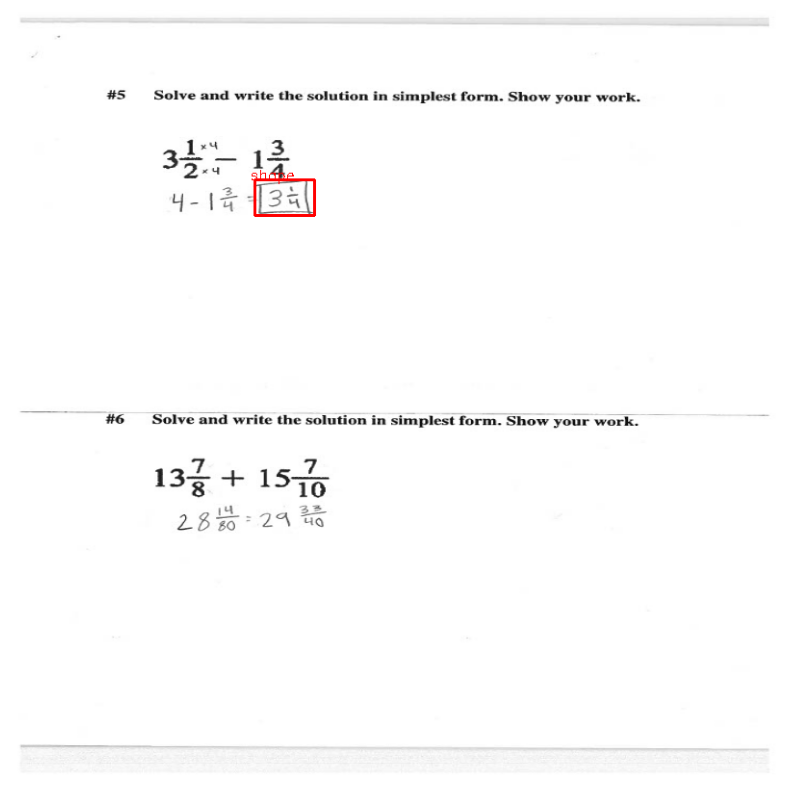

In [134]:
test_pipeline('c.jpg')

1/1 [==============================] - 0s 22ms/step


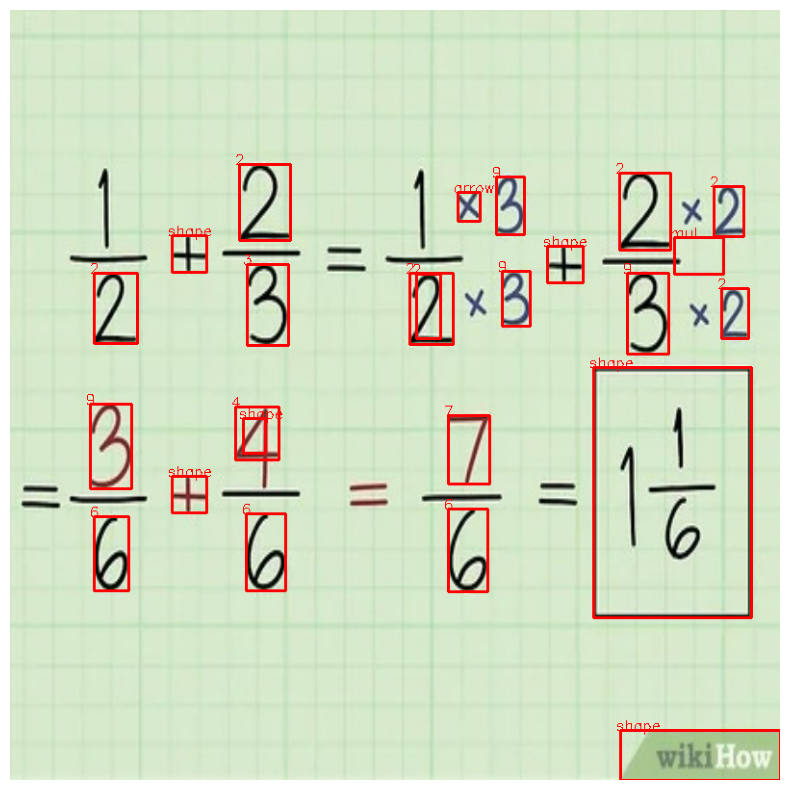

In [135]:
test_pipeline('rightanswer.jpg')

1/1 [==============================] - 0s 28ms/step


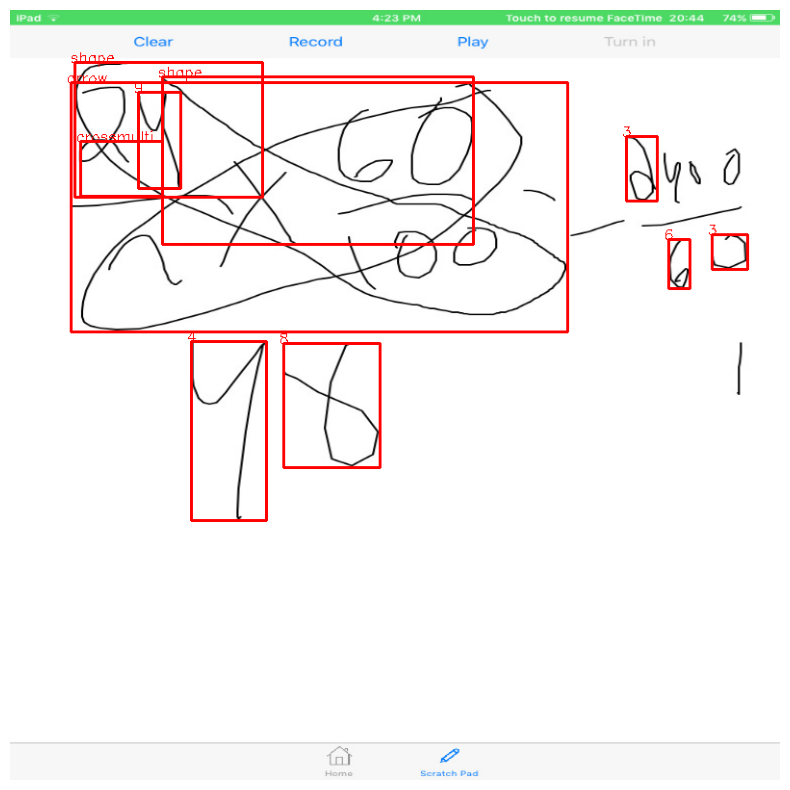

In [136]:
test_pipeline('85785.jpg')

1/1 [==============================] - 0s 20ms/step


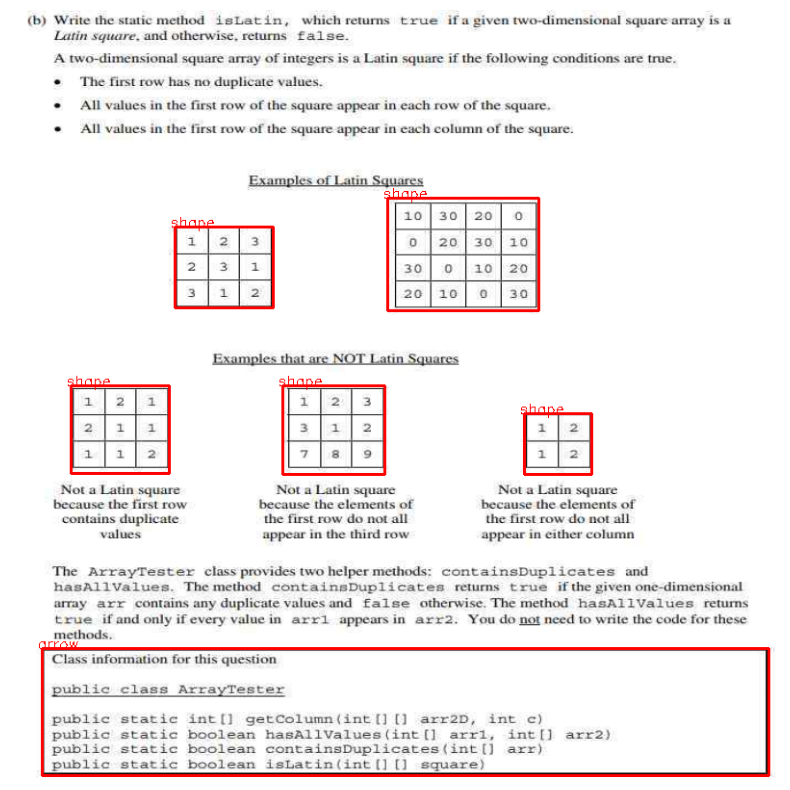

In [137]:
test_pipeline('256992.jpg')